# **I. Importing Libraries**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# **II. Data Reading**

In [3]:
original_dataset = pd.read_csv("02 diamonds_regression.csv")
original_dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
original_dataset.shape

(53940, 11)

In [4]:
original_dataset.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [5]:
original_dataset.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
original_dataset.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [4]:
original_dataset.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# **III. Data Cleaning**

In [60]:
cleaned_dataset = original_dataset.drop(axis=1, columns=["Unnamed: 0"])
cleaned_dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
features = cleaned_dataset.columns.to_list()
features_quanti = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
features_quali = ['cut', 'color', 'clarity']

In [49]:
unique_values = []
for x in features:
    val = []  
    if cleaned_dataset[x].dtype == 'float64' or cleaned_dataset[x].dtype == 'int64':
        val.append(cleaned_dataset[x].unique().min())
        val.append(cleaned_dataset[x].unique().max())
        unique_values.append(val)
    else:
        unique_values.append(cleaned_dataset[x].unique().tolist())
unique_values

[[0.2, 5.01],
 ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],
 ['E', 'I', 'J', 'H', 'F', 'G', 'D'],
 ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
 [43.0, 79.0],
 [43.0, 95.0],
 [326, 18823],
 [0.0, 10.74],
 [0.0, 58.9],
 [0.0, 31.8]]

In [61]:
new_values = [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8]]
replaced_dataset = cleaned_dataset
for idx, x in enumerate(features_quali):
    replaced_dataset[x] = replaced_dataset[x].replace(unique_values[idx+1], new_values[idx])
replaced_dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,4,1,61.0,58.0,2757,6.15,6.12,3.74


# **IV. Data Analysis**
<ol>
  <li>Correlation of Quantitative Measurements</li>
  <li>Correlation of Qualitative Measurements</li>
</ol>

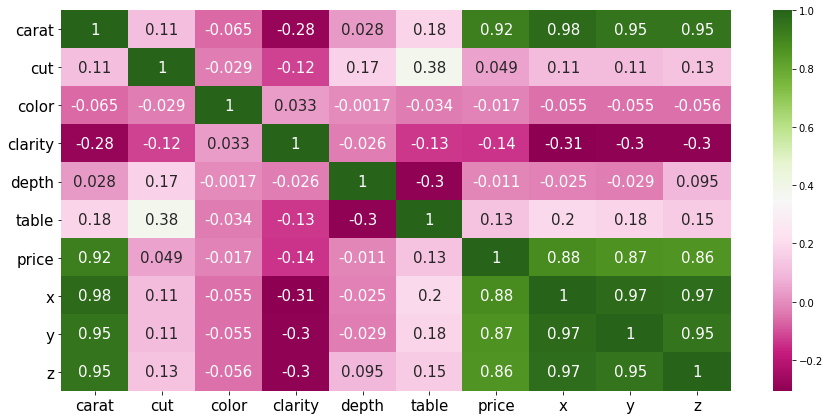

In [64]:
fig, ax = plt.subplots(figsize=[15, 7])
corr=cleaned_dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax, cmap="PiYG", annot=True, annot_kws={"fontsize":15})
ax.set_yticklabels(labels=features, size=15, rotation=0)
ax.set_xticklabels(labels=features, size=15)
plt.show()

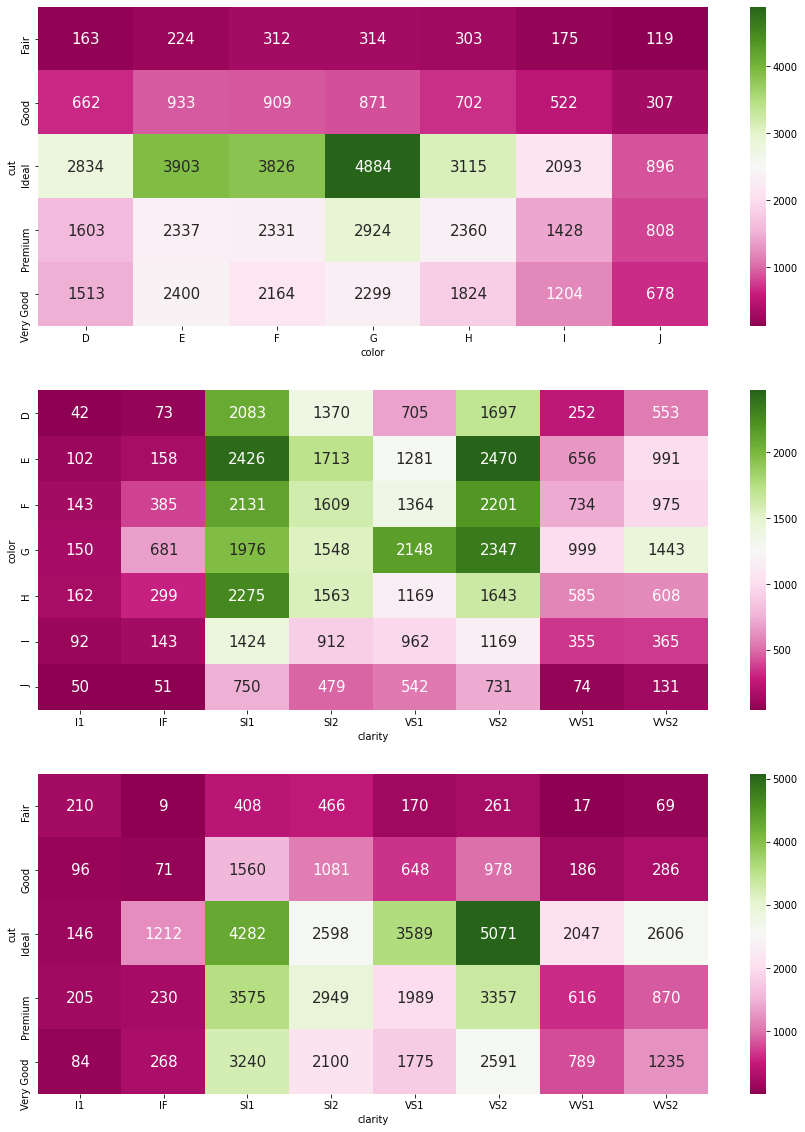

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[15, 20])
sns.heatmap(pd.crosstab(cleaned_dataset['cut'], cleaned_dataset['color']),cmap="PiYG", annot=True, annot_kws={"fontsize":15}, fmt="g", ax=ax1)
ax.set_yticklabels(labels=sorted(unique_values[2]), size=15, rotation=0)
ax.set_xticklabels(labels=sorted(unique_values[2]), size=15)
sns.heatmap(pd.crosstab(cleaned_dataset['color'], cleaned_dataset['clarity']),cmap="PiYG", annot=True, annot_kws={"fontsize":15}, fmt="g", ax=ax2)
ax.set_yticklabels(labels=sorted(unique_values[2]), size=15, rotation=0)
ax.set_xticklabels(labels=sorted(unique_values[2]), size=15)
sns.heatmap(pd.crosstab(cleaned_dataset['cut'], cleaned_dataset['clarity']),cmap="PiYG", annot=True, annot_kws={"fontsize":15}, fmt="g", ax=ax3)
ax.set_yticklabels(labels=sorted(unique_values[2]), size=15, rotation=0)
ax.set_xticklabels(labels=sorted(unique_values[2]), size=15)
plt.show()

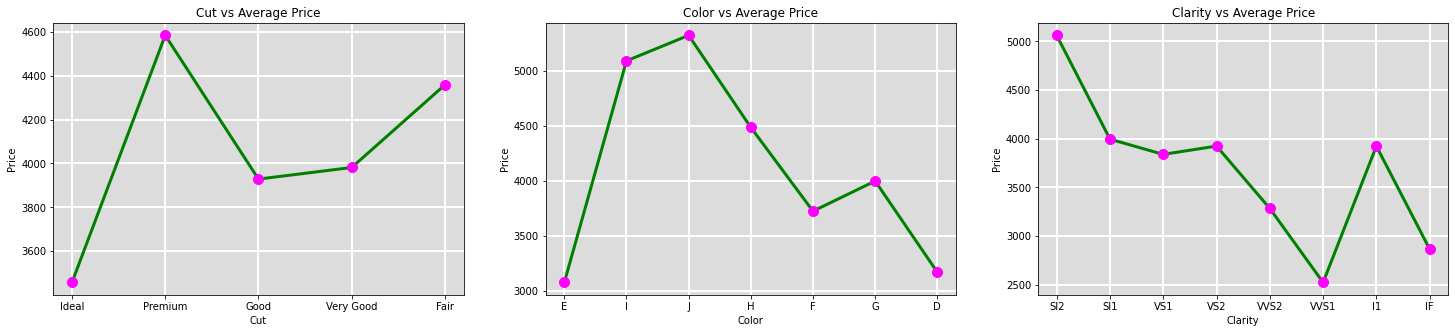

In [16]:
plt.figure(figsize=[25, 5])
for idx, x in enumerate(features_quali):
    prices = []
    for y in unique_values[idx+1]:
        sample = cleaned_dataset.loc[cleaned_dataset[x] == y]
        prices.append(sum(sample['price'])/len(sample['price']))
    plt.subplot(1, 3, idx+1)
    plt.title(x.title() +" vs Average Price")
    plt.xlabel(x.title())
    plt.ylabel('Price')
    plt.plot(unique_values[idx+1], prices, linewidth=3, color='green', zorder=5)
    plt.scatter(unique_values[idx+1], prices, s=100, color='fuchsia', zorder=15)
    plt.grid(linewidth=2, color="w")
    ax = plt.gca()
    ax.set_facecolor('gainsboro')
    ax.set_axisbelow(True)  
plt.show()

<Figure size 1872x432 with 0 Axes>

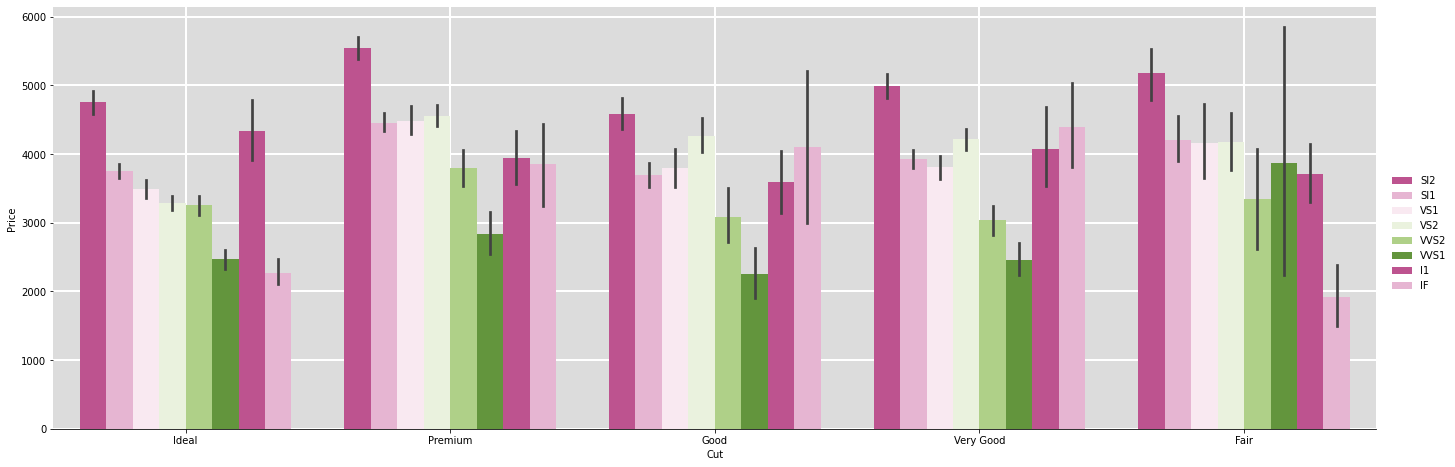

<Figure size 1872x432 with 0 Axes>

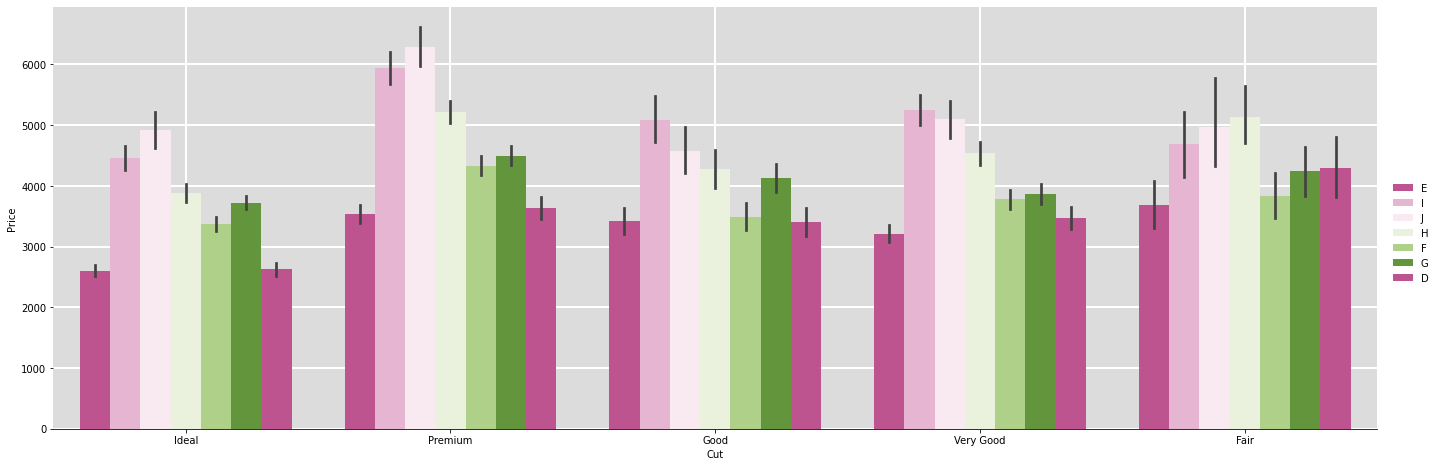

In [44]:
plt.figure(figsize=(26, 6))
g = sns.catplot(data=cleaned_dataset, kind="bar", x="cut", y="price", hue="clarity", palette=sns.color_palette('PiYG'), height=6.4, aspect=3)
g._get_palette
g.despine(left=True)
g.set_axis_labels("Cut", "Price")
g.legend.set_title("")
plt.grid(linewidth=2, color="w")
ax = plt.gca()
ax.set_facecolor('gainsboro')
ax.set_axisbelow(True)  
plt.show()

plt.figure(figsize=(26, 6))
g = sns.catplot(data=cleaned_dataset, kind="bar", x="cut", y="price", hue="color", palette=sns.color_palette('PiYG'), height=6.4, aspect=3)
g._get_palette
g.despine(left=True)
g.set_axis_labels("Cut", "Price")
g.legend.set_title("")
plt.grid(linewidth=2, color="w")
ax = plt.gca()
ax.set_facecolor('gainsboro')
ax.set_axisbelow(True)  
plt.show()

# **V. Data Modeling** 

In [73]:
y = replaced_dataset['price']
X = replaced_dataset[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [74]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

# **VI. Analysis**